In [1]:
from IPython.core.display import HTML
HTML("<style>.container { width:95% !important; }</style>")

# Lecture 9: Methods using KKT conditions

# Reminder: optimality conditions
We consider an optimization problem of the form:
$$
\begin{align} \
\min \quad &f(x)\\
\text{s.t.} \quad & g_j(x) \geq 0\text{ for all }j=1,\ldots,J\\
& h_k(x) = 0\text{ for all }k=1,\ldots,K\\
&x\in \mathbb R^n.
\end{align}
$$

Necessary KKT conditions require for an optimal solution to satisfy

$$
\begin{align}
&\nabla_xL(x^*,\mu^*,\lambda^*) = 0\\
&\mu_j^*\geq0,\text{ for all }j=1,\ldots,J\\
&\mu_j^*g_j(x^*)=0,\text{for all }j=1,\ldots,J,
\end{align}
$$

where $\mu^*=(\mu_1^*,\ldots,\mu_J^*)$ and $\lambda^* = (\lambda^*_1,\ldots,\lambda_K^*)$ are called Lagrange multiplier vectors for the inequality and the equality constraints, respectively. 

Function $L$ is the *Lagrangian function* $$L(x,\mu,\lambda) = f(x)- \sum_{j=1}^J\mu_jg_j(x) -\sum_{k=1}^K\lambda_kh_k(x)$$.


### Geometry of the KKT conditions


* The stationary rule says that, at the optimum ($x^*$), there is no feasible descent direction ($F\cap D = \varnothing $), i.e.,   

$$
-\nabla f = \sum_j - \mu_j \nabla g_j\text{ , for } \mu_j \geq 0 \text{ , i.e., } g_j \text{ is active at } x^* \text{. }
$$

* In other words, $-\nabla f$ belongs to the cone defined by the (-) gradients of the active constraints (set of infeasible directions)

* The complementary rules make sure only the active constraints are considered.



#### Example.

![](images/kkt_vis2.jpg)

### Note.

* $min f(x)$ $\rightarrow $  $-\nabla f$ (descent direction)
* $max f(x)$ $\rightarrow $  $ \nabla f$ (ascent direction)

* $g(x) \geq 0$ $\rightarrow $  $-\nabla g$ (infeasible direction)
* $g(x) \leq 0$ $\rightarrow $  $ \nabla g$ (infeasible direction)

## Sequential Quadratic Programming (SQP)

**Idea is to generate a sequence of quadratic optimization problems whose solutions approach the solution of the original problem**

**Quadratic problems are based on applying KKT conditions to the original problem**

* Minimize a quadratic approximation of the Lagrangian function with respect to linear approximation of the constraints
* Also referred as **projected Lagrangian method**

Let us consider problem

$$
\min f(x)\\
\text{s.t. }h_k(x) = 0\text{ for all }k=1,\ldots,K,
$$

where the objective function and the equality constraints are twice differentiable. 

Inequality constraints can be handled, e.g., by using active set methods. 

**Note that constraints can be nonlinear.**

Because we know that the optimal solution of this problem satisfies the KKT conditions, we know that

$$
\left\{\begin{array}{l}
\nabla_xL(x,\lambda)=\nabla_x f(x) + \lambda\nabla_x h(x) = 0\\
h(x) = 0
\end{array}\right.
$$

Let us assume that we have a current estimation for the solution of the equality constraints $(x_k,\lambda_k)$, then according to the Newton's method for root finding (see e.g., https://en.wikipedia.org/wiki/Newton%27s_method#Generalizations ), we have another solution $(x_k,\lambda_k)^T+(p,v)^T$ of the problem by solving system of equations

$$
\nabla_{x,\lambda} S(x_k,\lambda_k)\left[\begin{align}p^T\\v^T\end{align}\right] = -S(x_k,\lambda_k),
$$

where $S(x_k,\lambda_k)=\left[
\begin{array}{c}
\nabla_{x}L(x_k,\lambda_k)\\
h(x_k)
\end{array}
\right]
$. 


This can be written as

$$
\left[
\begin{array}{cc}
\nabla^2_{xx}L(x_k,\lambda_k)&\nabla_x h(x_k)\\
\nabla_x h(x_k)^T & 0
\end{array}
\right]
\left[\begin{array}{c}p^T\\v^T\end{array}\right] =
\left[
\begin{array}{c}
-\nabla_x L(x_k,\lambda_k)\\
-h(x_k)^T
\end{array}
\right].
$$


However, the above is just the solution of the quadratic problem with equality constraints
$$
\min_p \frac12 p^T\nabla^2_{xx}L(x^k,\lambda^k)p+\nabla_xL(x^k,\lambda^k)^Tp\\
\text{s.t. }h_j(x^k) + \nabla h_j(x^k)^Tp = 0. 
$$

## Intuitive interpretation

We are approximating the Lagrange function quadratically around the current solution and the constraints are approximated linearly. SQP methods are also referred to as *projected Lagrangian methods* 
* compare with projected gradient method from lecture 7

**Another view point to building the approximation**: Assume that we have a current solution candidate $(x_k,\lambda_k)$. Using Taylor's series for the constraints $h_i(x)$ at the current approximation ($x^* = x_k + d$) and including only the first order term we get

$h_i(x^*)=h_i(x_k+d)\approx h_i(x_k) + \nabla h_i(x_k)^Td$

Since, $h_i(x^*)=0$ for all $i$ we have

$\nabla h(x_k)d = -h(x_k)$

For approximating the Lagrangian function, we use up to second order terms and get

$L(x_k+d,\lambda^*) \approx L(x_k,\lambda^*) + d^T\nabla_x L(x_k,\lambda^*) + \frac{1}{2}d^T\nabla_{xx}^2L(x_k,\lambda^*)d$

When combining both approximations, we get a quadratic subproblem

$$
\underset{d}{\min}d^T\nabla_x L(x_k,\lambda_k) + \frac{1}{2}d^T \nabla_{xx}^2L(x_k,\lambda_k)d\\
\text{s.t. } \nabla h(x_k)d = -h(x_k)
$$

It can be shown (under some assumptions) that solutions of the quadratic subproblems approach $x^*$ and Lagrange multipliers approach $\lambda^*$.

Note that we can either use the exact Hessian of the Lagrange function (requires second derivatives) or some approximation of it (compare Newton's method vs. quasi-Newton ideas). 

## Implementation

Define an optimization problem, where
* $f(x) = \|x\|^2 = \sum_{i=1}^n x_i^2$
* $h(x) = \sum_{i=1}^nx_i=n$

What is $x^*$?

In [6]:
def f_constrained(x):
    return sum([i**2 for i in x]),[],[sum(x)-len(x)]
#    return sum([i**2 for i in x]),[],[sum(x)-len(x),x[0]**2+x[1]-2]


In [7]:
print(f_constrained([1,0,1]))
print(f_constrained([1,2,3,4]))

(2, [], [-1])
(30, [], [6])


In [8]:
import numpy as np
import ad


#if k=0, returns the gradient of lagrangian, if k=1, returns the hessian
def diff_L(f,x,l,k):
    #Define the lagrangian for given f and Lagrangian multiplier vector l
    L = lambda x_: f(x_)[0] + (np.matrix(f(x_)[2])*np.matrix(l).transpose())[0,0]
    return ad.gh(L)[k](x)

#Returns the gradients of the equality constraints
def grad_h(f,x):
    return  [ad.gh(lambda y:
                   f(y)[2][i])[0](x) for i in range(len(f(x)[2]))] 

#Solves the quadratic problem inside the SQP method
def solve_QP(f,x,l):
    left_side_first_row = np.concatenate((\
    np.matrix(diff_L(f,x,l,1)),\
    np.matrix(grad_h(f,x)).transpose()),axis=1)
    left_side_second_row = np.concatenate((\
    np.matrix(grad_h(f,x)),\
    np.matrix(np.zeros((len(f(x)[2]),len(f(x)[2]))))),axis=1)
    right_hand_side = np.concatenate((\
    -1*np.matrix(diff_L(f,x,l,0)).transpose(),
    -np.matrix(f(x)[2]).transpose()),axis = 0)
    left_hand_side = np.concatenate((\
                                    left_side_first_row,\
                                    left_side_second_row),axis = 0)
    temp = np.linalg.solve(left_hand_side,right_hand_side)
    return temp[:len(x)],temp[len(x):] # update for both x and l
    
    

def SQP(f,start,precision):
    x = start
    l = np.ones(len(f(x)[2])) # initialize Lagrange multiplier vector l as a vector of 1s
    f_old = float('inf')
    f_new = f(x)[0]
    while abs(f_old-f_new)>precision:
        print(x)
        f_old = f_new
        (p,v) = solve_QP(f,x,l) # obtain updates for x and l by solving the quadratic subproblem
        x = x+np.array(p.transpose())[0] # update the solution x 
        l = l+v # update the Lagrange multipliers l
        f_new = f(x)[0]
    return x

In [9]:
x0 = [2000.0,1000.0,3000.0,5000.0,6000.0]
SQP(f_constrained,x0,0.0001)

[2000.0, 1000.0, 3000.0, 5000.0, 6000.0]
[1. 1. 1. 1. 1.]


array([1., 1., 1., 1., 1.])

## Lagrangian methods -- "The original method of multipliers"

Let us again consider problem

$$
\min f(x)\\
\text{s.t. }h_k(x) = 0\text{ for all }k=1,\ldots,K,
$$

where the objective function and the equality constraints are twice differentiable. Inequality constaints can be handled, e.g., by first converting them into equality constraints which increases the number of variables.

We know that if $x^*$ is optimal solution, then $\nabla_x L(x^*,\lambda^*) = \nabla f(x^*) + \sum_{k=1}^K\lambda^*_k \nabla h_k(x^*) = 0$ 
(<i>necessary condition</i>). 

<b>However</b>, if we only know that for $x^*$ it holds that $\nabla_x L(x^*,\lambda^*) = 0$, we can't be sure that $x^*$ is a local minimizer. (Why???)

Since the Hessian $\nabla^2_{xx}L(x^*,\lambda^*)$ may be indefinitive, it is not sufficient to just minimize the Langrangian function $L(x,\lambda)$ in order to minimize $f(x)$ with respect to the equality constraints $h_k(x)=0$.

<i>Solution: Improve Lagrangian function</i>

Define augmented Lagrangian function
$$
L_c(x,\lambda) = f(x)+\lambda h(x)+\frac12c\|h(x)\|^2.
$$
Above $c\in \mathbb R$ is a penalty parameter and $\lambda \in \mathbb R^K$ is a multiplier.

Now, we have
$$
\nabla^2_{xx}L_c(x^*,\lambda^*) = \nabla^2_{xx}L(x^*,\lambda^*) + c\nabla h(x^*)^T\nabla h(x^*)
$$
and it can be shown that for $c>\hat{c}$ the Hessian of the augmented Lagrangian is positive definite (<i>sufficient condition for optimality</i>).

Let us consider sequence of optimization problems
$$
\min_{x\in\mathbb R^n} f(x)+\lambda_k h(x)+\frac{1}{2}c_k\|h(x)\|^2,
$$
where $c_{k+1}>c_k$ for $k=1,2,\ldots$.

Now, if $\lambda_k=0$ for all $k=1,2,\ldots$, then we have a penalty function method, which solves the problem when $c_k\to \infty$.

However, it can be shown, that if we set $\lambda_0$ randomly and keep on updating
$\lambda_{k+1} = \lambda_k+c_kh(x_k)$, then we can show that there exists $C>0$ such that of $c_k>C$, then the optimal solution of the augmented Langrangian solves the original problem!

### Example

Let us have optimization problem
$$
\min x_1^2+x_2^2\\
\text{s.t. }x_1+x_2-1=0.
$$

Now, the minimization of the augmented Lagrangian becomes
$$
\min_{x\in\mathbb R^n} x_1^2+x_2^2+\lambda_k(x_1+x_2-1)+\frac12c_k(x_1+x_2-1)^2.\\
$$

In [10]:
def f_constrained2(x):
    return sum([i**2 for i in x]),[],[sum(x)-1]

In [11]:
def augmented_langrangian(f,x,la,c):
    second_term = float(numpy.matrix(la)*numpy.matrix(f(x)[2]).transpose())
    third_term = 0.5*c*numpy.linalg.norm(f(x)[2])**2
    return f(x)[0]+second_term+third_term

In [12]:
from scipy.optimize import minimize
import numpy
def augmented_langrangian_method(f,start,la0,c0):
    x_old = [float('inf')]*2
    x_new = start
    f_old = float('inf')
    f_new = f(x_new)[0]
    la = la0
    c = c0
    steps = []
    while abs(f_old-f_new)>0.00001:
#    while numpy.linalg.norm(f(x_new)[2])>0.00001: # doesn't work as itself, see starting from any feasible point
        res = minimize(lambda x:augmented_langrangian(f,x,la,c),x_new)
        x_old = x_new
        f_old = f_new
        la = float(la+numpy.matrix(c)*numpy.matrix(f(res.x)[2]).transpose()) # update Lagrangian
        x_new = res.x
        f_new = f(x_new)[0]
        c = 2*c # increase the penalty coefficient
        steps.append(list(x_new))
    return x_new,c, steps

In [23]:
#x0 =[1/3,2/3]
x0 =[10,-5]
l0 = 1.0
c0 = 1.0
[x,c,steps_ag] = augmented_langrangian_method(f_constrained2,x0,l0,c0)
print(x)
print(c)
print(len(steps_ag))

[0.5000001  0.49999989]
256.0
8


In [24]:
import matplotlib.pyplot as plt
import numpy as np

def plot_2d_steps2(steps,start,interval):
    myvec = np.array([start]+steps).transpose()
    plt.plot(myvec[0,],myvec[1,],'rx')
    for label,x,y in zip([str(i) for i in range(len(steps)+1)],myvec[0,],myvec[1,]):
        plt.annotate(label,xy = (x, y))
    # plot constraint
    z = np.arange(interval[0],interval[1],0.1)
    l = len(z)
    con = [1.0-z[i] for i in range(l)]
    plt.plot(z,con,'b-')
    return plt

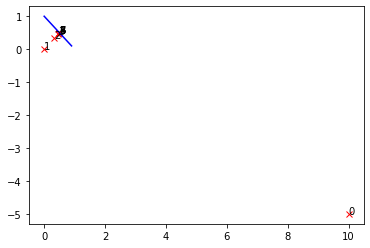

In [25]:
plot_2d_steps2(steps_ag,x0,[0,1]).show()

## Compare with penalty function method

In [26]:
from scipy.optimize import minimize
import numpy
def penalty_function_method(f,start,c0):
    x_old = float('inf')
    x_new = start
    f_old = float('inf')
    f_new = f(x_new)[0]
    c = c0
    steps = []
    while abs(f_old-f_new)>0.00001:
#    while numpy.linalg.norm(f(x_new)[2])>0.00001:
        res = minimize(lambda x:augmented_langrangian(f,x,0,c),x_new)
        x_old = x_new
        f_old = f_new
        x_new = res.x
        f_new = f(x_new)[0]
        c = 2*c
        steps.append(list(x_new))
    return x_new,c,steps

In [27]:
[x,c,steps_pf] = penalty_function_method(f_constrained2,x0,c0)
print(x) 
print(c)
print(len(steps_pf))

[0.49999625 0.49999611]
262144.0
18


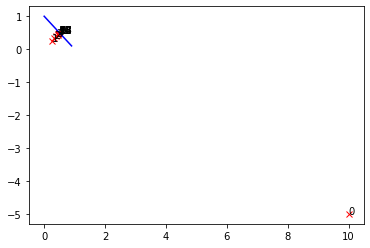

In [28]:
plot_2d_steps2(steps_pf,x0,[0,1]).show()

## What is going on in here?

The above is a simplified representation of the augmented Lagrangian method. For example, one can use exact second derivatives for calculating $\nabla^2_{xx}L(x^*,\mu^*)$ to obtain better convergence but, also, one can approximate it by utilizing ideas from quasi-Newton methods in order to not requiring second derivatives. Efficient implementation of this (and other methods) for practical problems is not completely trivial, unfortunately. If you want to read details, please see, e.g., http://www.mit.edu/~dimitrib/Constrained-Opt.pdf.

## Compare with SQP

In [29]:
import numpy as np
import ad


#if k=0, returns the gradient of lagrangian, if k=1, returns the hessian
def diff_L(f,x,l,k):
    #Define the lagrangian for given m and f
    L = lambda x_: f(x_)[0] + (np.matrix(f(x_)[2])*np.matrix(l).transpose())[0,0]
    return ad.gh(L)[k](x)

#Returns the gradients of the equality constraints
def grad_h(f,x):
    return  [ad.gh(lambda y:
                   f(y)[2][i])[0](x) for i in range(len(f(x)[2]))] 

#Solves the quadratic problem inside the SQP method
def solve_QP(f,x,l):
    left_side_first_row = np.concatenate((\
    np.matrix(diff_L(f,x,l,1)),\
    np.matrix(grad_h(f,x)).transpose()),axis=1)
    left_side_second_row = np.concatenate((\
    np.matrix(grad_h(f,x)),\
    np.matrix(np.zeros((len(f(x)[2]),len(f(x)[2]))))),axis=1)
    right_hand_side = np.concatenate((\
    -1*np.matrix(diff_L(f,x,l,0)).transpose(),
    -np.matrix(f(x)[2]).transpose()),axis = 0)
    left_hand_side = np.concatenate((\
                                    left_side_first_row,\
                                    left_side_second_row),axis = 0)
    temp = np.linalg.solve(left_hand_side,right_hand_side)
    return temp[:len(x)],temp[len(x):]
    
    

def SQP(f,start,precision):
    x = start
    l = np.ones(len(f(x)[2]))
    f_old = float('inf')
    f_new = f(x)[0]
    while abs(f_old-f_new)>precision:
        print(x)
        f_old = f_new
        (p,v) = solve_QP(f,x,l)
        x = x+np.array(p.transpose())[0]
        l = l+v
        f_new = f(x)[0]
    return x

In [30]:
#x0 = [-3000,2500]
SQP(f_constrained2,x0,0.00001)

[10, -5]
[0.5 0.5]


array([0.5, 0.5])

In [ ]:
!jupyter nbconvert 'Lecture 09, Methods using KKT conditions.ipynb' --to slides --post serve

[NbConvertApp] Converting notebook Lecture 09, Methods using KKT conditions.ipynb to slides
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 357445 bytes to Lecture 09, Methods using KKT conditions.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Lecture 09, Methods using KKT conditions.slides.html
Use Control-C to stop this server
